In [13]:
import pandas as pd
import csv
import os
import time
from collections import defaultdict
import numpy as np
import itertools
import db_structure
import networkx as nx
from imp import reload
import matplotlib.pyplot as plt
import utilities as u
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
DB = db_structure.DB('sample1')

In [ ]:
DB.assign_fk(table_1_name='employees', table_2_name='customers', column_1='employeeNumber', column_2='salesRepEmployeeNum')
DB.assign_fk(table_1_name='orders', table_2_name='customers', column_1='customerNum', column_2='customerNumber')
DB.assign_fk(table_1_name='products', table_2_name='productlines', column_1='productLine', column_2='ProductLine')

In [ ]:
DB.assign_fk(table_1_name='amz_book', table_2_name='book', column_1='book_id', column_2='id')
DB.assign_fk(table_1_name='amz_listing', table_2_name='purchases', column_1='purchase_id', column_2='id')
DB.assign_fk(table_1_name='amz_listing', table_2_name='book', column_1='book_id', column_2='id')
DB.assign_fk(table_1_name='amz_pricing_history', table_2_name='amz_listing', column_1='amz_listing_id', column_2='id')
DB.assign_fk(table_1_name='purchases', table_2_name='book', column_1='book_id', column_2='id')

/home/sareen/Dropbox/Programming/Arbitrage/venv/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/sareen/Dropbox/Programming/Arbitrage/venv/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


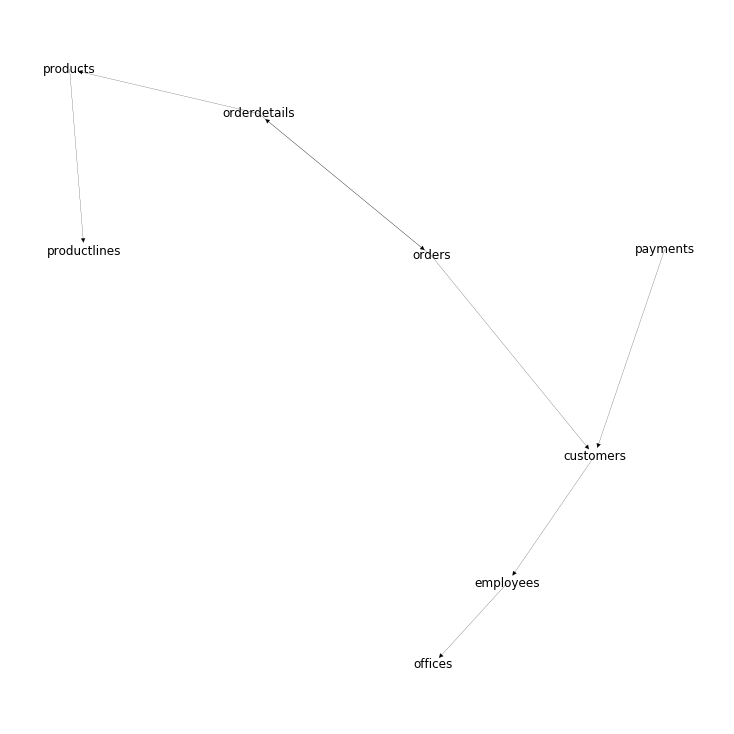

In [15]:
G = nx.DiGraph()
G.add_nodes_from(DB.tables.keys())
for current_table_name, current_table in DB.tables.items():
    for sibling in current_table.get_sibling_names():
        G.add_edge(current_table_name, sibling)
        G.add_edge(sibling, current_table_name)
    for child in current_table.get_children_names():
        G.add_edge(current_table_name, child)
plt.figure(figsize=(10,10))
#pos = nx.spring_layout(G)
#nx.set_node_attributes(G, pos, 'pos')
#nx.draw_networkx(G, font_weight='bold', node_shape="None", width=0.2)
A = nx.nx_agraph.to_agraph(G)
H = nx.nx_agraph.from_agraph(A)
nx.draw_spring(H, node_shape="None", with_labels=True, width=0.2)

In [20]:
df_2 = DB.tables['customers'].df

In [21]:
df_1 = DB.tables['payments'].df

In [22]:
df_joined = df_1.merge(df_2, left_on='customerNumber_[payments]', right_on='customerNumber_[customers]')

In [54]:
g = df_joined.groupby('salesRepEmployeeNum_[customers]')['amount_[payments]'].mean().reset_index()

In [52]:
for index, data in g.iterrows():
    #print(data)
    print(data['salesRepEmployeeNum_[customers]'])

salesRepEmployeeNum_[customers]     1.00
amount_[payments]                  66.83
Name: 0, dtype: float64
1.0
salesRepEmployeeNum_[customers]    2.0
amount_[payments]                  6.9
Name: 1, dtype: float64
2.0
salesRepEmployeeNum_[customers]     3.00
amount_[payments]                  15.13
Name: 2, dtype: float64
3.0
salesRepEmployeeNum_[customers]     5.00
amount_[payments]                  19.55
Name: 3, dtype: float64
5.0


In [39]:
df_joined

,customerNumber_[payments],checkNumber_[payments],amount_[payments],customerNumber_[customers],LastName_[customers],FirstName_[customers],salesRepEmployeeNum_[customers]
0,1,1001,3.50,1,Bob,Billy,1
1,2,2002,2.75,2,Jenkins,Sally,1
2,2,1001,0.00,2,Jenkins,Sally,1
3,2,1002,20.24,2,Jenkins,Sally,1
4,3,2003,30.14,3,Hobbes,Calvin,1
5,3,4004,4.50,3,Hobbes,Calvin,1
6,3,5005,5.70,3,Hobbes,Calvin,1
7,4,6006,6.90,4,Jacob,John,2
8,5,7007,7.00,5,Smith,Peter,3
9,6,8008,8.13,6,Carpenter,Selma,3
